In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn-v0_8-colorblind')

# Students Performance in Exams

Este dataset consiste en las calificationes obtenidas por estudiantes en diversas materias. 

Es utilizado para entender la influencia que tiene la preparacion para los examenes, el nivel de estudios de los padres y otras variables de entorno en el rendimiento academico en los examenes.


Variables:
* **gender**: Sexo del estudiante (Variable Binaria)
* **race/ethnicity**: Etnia de los estudiantes (Variable Categorica).
* **parental level of education**: Grado de estudio de los padres (Variable Categorica)
* **lunch**: Tipo de almuerzo antes del examen (Variable Categorica).
* **Test preparation**: Preparacion para el examen (variable binaria).
* **Math Score**: Calificacion obtenida en matematicas (Variable Numerica).
* **Reading Score**: Calificacion obtenida en lectura (Variable Numerica).
* **Writting Score**: Calificacion obtenida en escritura (Variable Numerica).


In [429]:
# cargar los datos
df=pd.read_csv(r'data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [430]:
num_obs=df.shape[0]
num_obs

1000

Hay 1000 datos en el dataset

In [431]:
# caracteristicas de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


El tipo de datos es el correcto para cada variable.

In [432]:
# datos vacios
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No hay datos perdidos/vacios en el dataset.

In [433]:
# datos duplicados
df.duplicated().sum()

np.int64(0)

No hay datos duplicados en el dataset

In [434]:
# numero de valores unicos en cada variable
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Estadisticas descriptivas

In [435]:
# VARIABLES categorcias
df.describe(include=['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [436]:
# variables numericas
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* La media de las tres materias se encuentra cercano al 70. 
* Los valores van desde 0 hasta 100.
* Parece ser que la distribucion para las tres variables se aproxima a una distribucion normal.
* La distribucion para las tres materias es similar.

In [437]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploracion de los datos

In [438]:
# agregar variables total (total) y promedio general (avg)
df['total']=df['math score']+df['writing score']+df['reading score']
df['avg']=df['total']/3

In [439]:
print('Promedio General de los estudiantes:', round(np.mean(df['avg']),2))

Promedio General de los estudiantes: 67.77


In [440]:
# separar variables segun su tipo
variables_numericas=[variable for variable in df.columns if df[variable].dtype !='O']
variables_categ=[variable for variable in df.columns if df[variable].dtype =='O']

variables_numericas.remove('total')
variables_numericas.remove('avg')
print('Variables numericas:', variables_numericas)
print('Variables Categoricas:,', variables_categ)

Variables numericas: ['math score', 'reading score', 'writing score']
Variables Categoricas:, ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [441]:
# numero de reprobados y sobressalientes
reprobado_mate=df[df['math score']<60].shape[0]
reprobado_escritura=df[df['writing score']<60].shape[0]
reprobado_lectura=df[df['reading score']<60].shape[0]


sobre_mate=df[df['math score']>=90].shape[0]
sobre_escritura=df[df['writing score']>=90].shape[0]
sobre_lectura=df[df['reading score']>=90].shape[0]


print('Numero de reprobados en matematicas:', reprobado_mate)
print('Numero de reprobados en lectura:', reprobado_lectura)
print('Numero de reprobados en escritura:', reprobado_escritura)
print()
print('Numero de sobresalientes en matematicas:', sobre_mate)
print('Numero de sobresalientes en lectura:', sobre_lectura)
print('Numero de sobresalientes en escritura:', sobre_escritura)

Numero de reprobados en matematicas: 323
Numero de reprobados en lectura: 254
Numero de reprobados en escritura: 281

Numero de sobresalientes en matematicas: 58
Numero de sobresalientes en lectura: 79
Numero de sobresalientes en escritura: 78


* La materia mas dificil para los estudiates parece ser matematicas teniendo el mayor numero de reprobados y menor numero de sobresalientes.

* Por el contrario, lectura es la mas sencilla.

* El numero de reprobados es aproximadamente el 28% entre las tres materias.

* Los alumnos sobresalientes representan entre el 6-8% de los estudiantes aproximandamente.


## Visualizacion de los Datos

### Analisis univariado: Histogramas

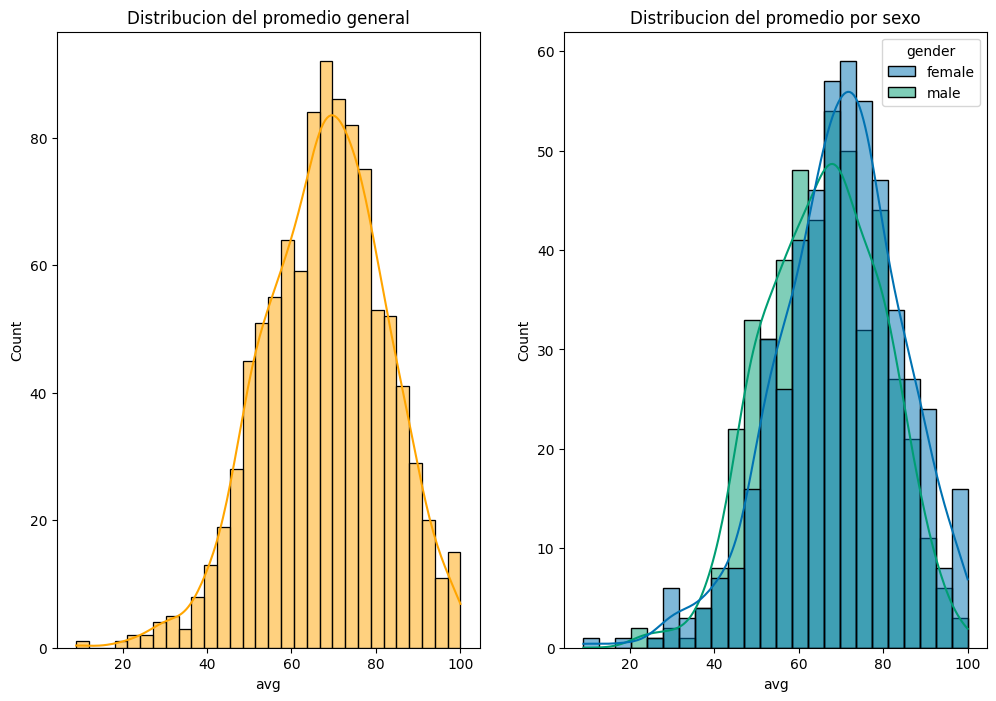

In [442]:
# distribucion del promedio general
fig, axs=plt.subplots(1,2, figsize=(12,8))

sns.histplot(data=df, x='avg', bins=30, kde=True, color='orange', ax=axs[0])
axs[0].set_title('Distribucion del promedio general')

sns.histplot(data=df, x='avg', kde=True, hue='gender')
axs[1].set_title('Distribucion del promedio por sexo')

plt.show()

* La distribucion de los datos parece estar sesgada a la izquierda.
* Para este dataset las mujeres tienen mayor promedio que los hombres.

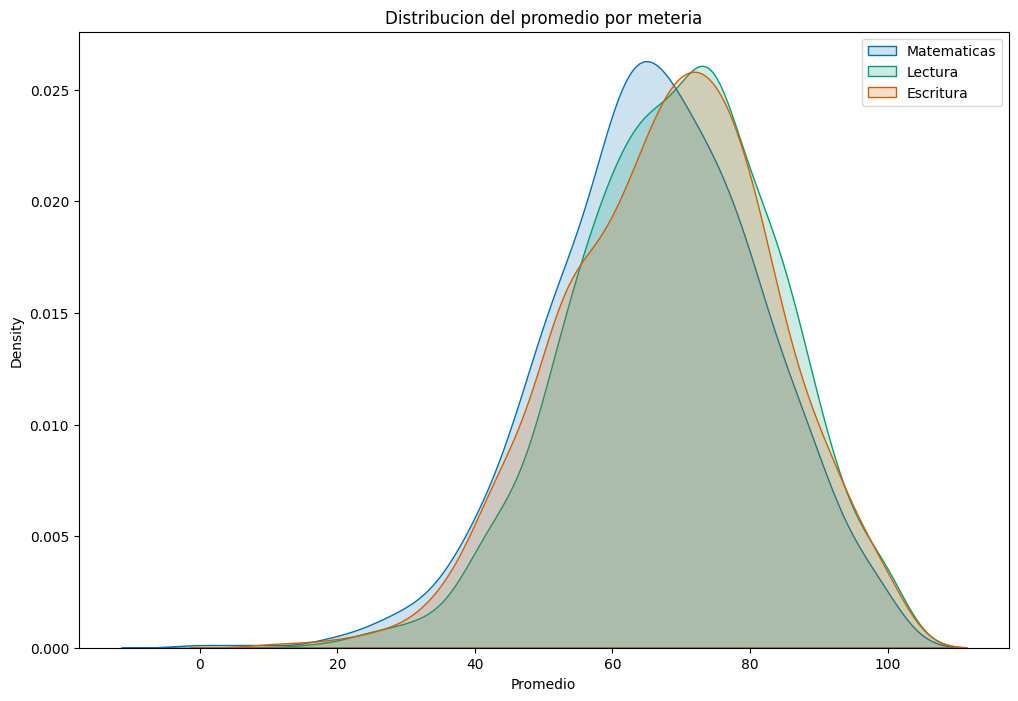

In [443]:
# distribucion de las calificaciones de cada materia

plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='math score',fill=True, alpha=0.2,label='Matematicas')
sns.kdeplot(data=df, x='reading score',fill=True,alpha=0.2, label='Lectura')
sns.kdeplot(data=df, x='writing score',fill=True,alpha=0.2,label='Escritura')

plt.title('Distribucion del promedio por meteria')
plt.xlabel('Promedio')
plt.legend()
plt.show()

* Matematicas es la materia con el menor promedio entre los estudiantes.
* Lectura es la materia con mayor promedio.

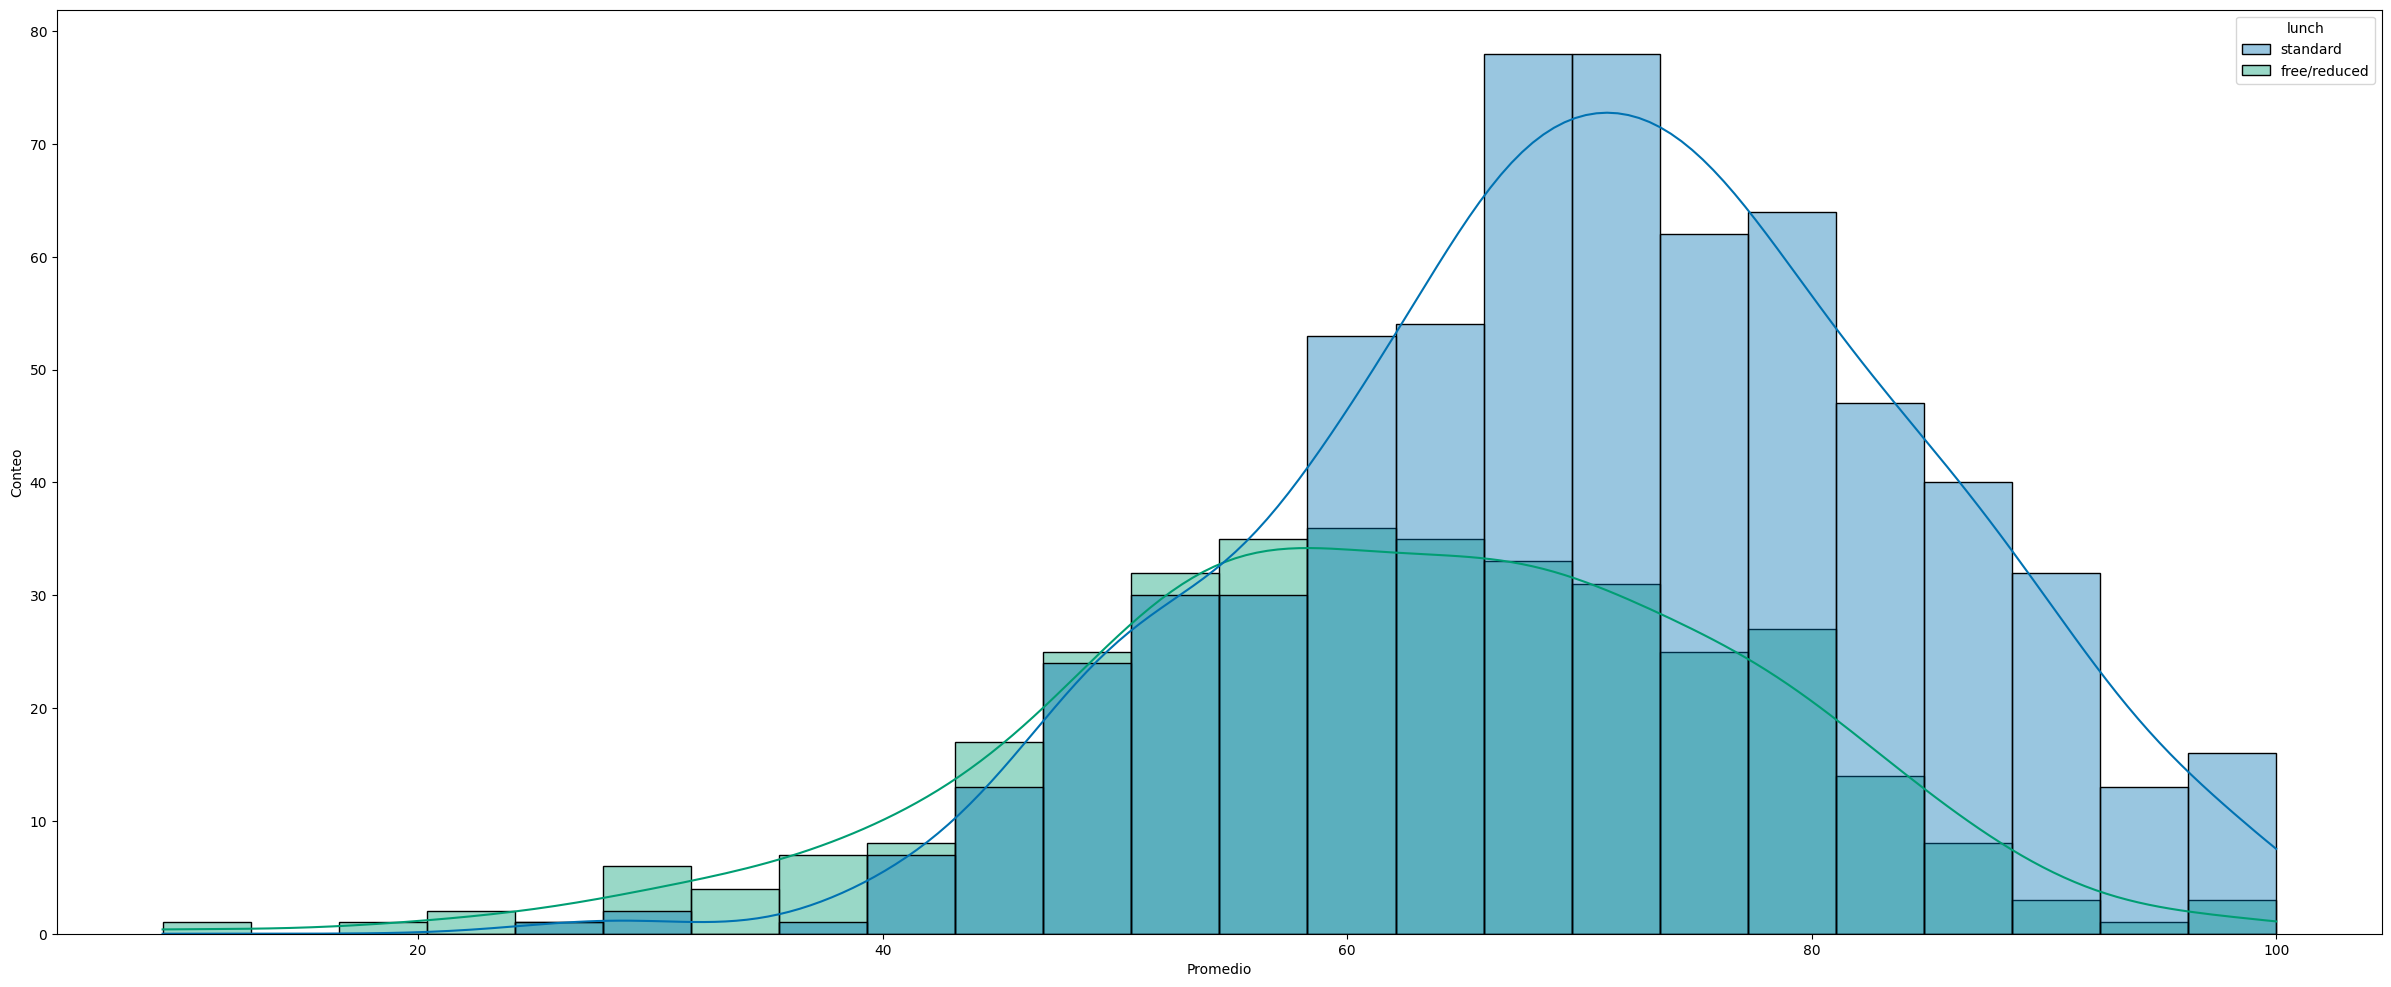

In [444]:
# impacto del almuerzo en el rendimiento academico


sns.histplot(data=df, x='avg', kde=True, hue='lunch', alpha=0.4)
plt.xlabel('Promedio')
plt.ylabel('Conteo')
plt.show()

* Los estudiantes con poco o nulo almuerzo rinden considerablemente menos que aquellos que si tienen un almuerzo estandar.

<Axes: xlabel='avg', ylabel='Density'>

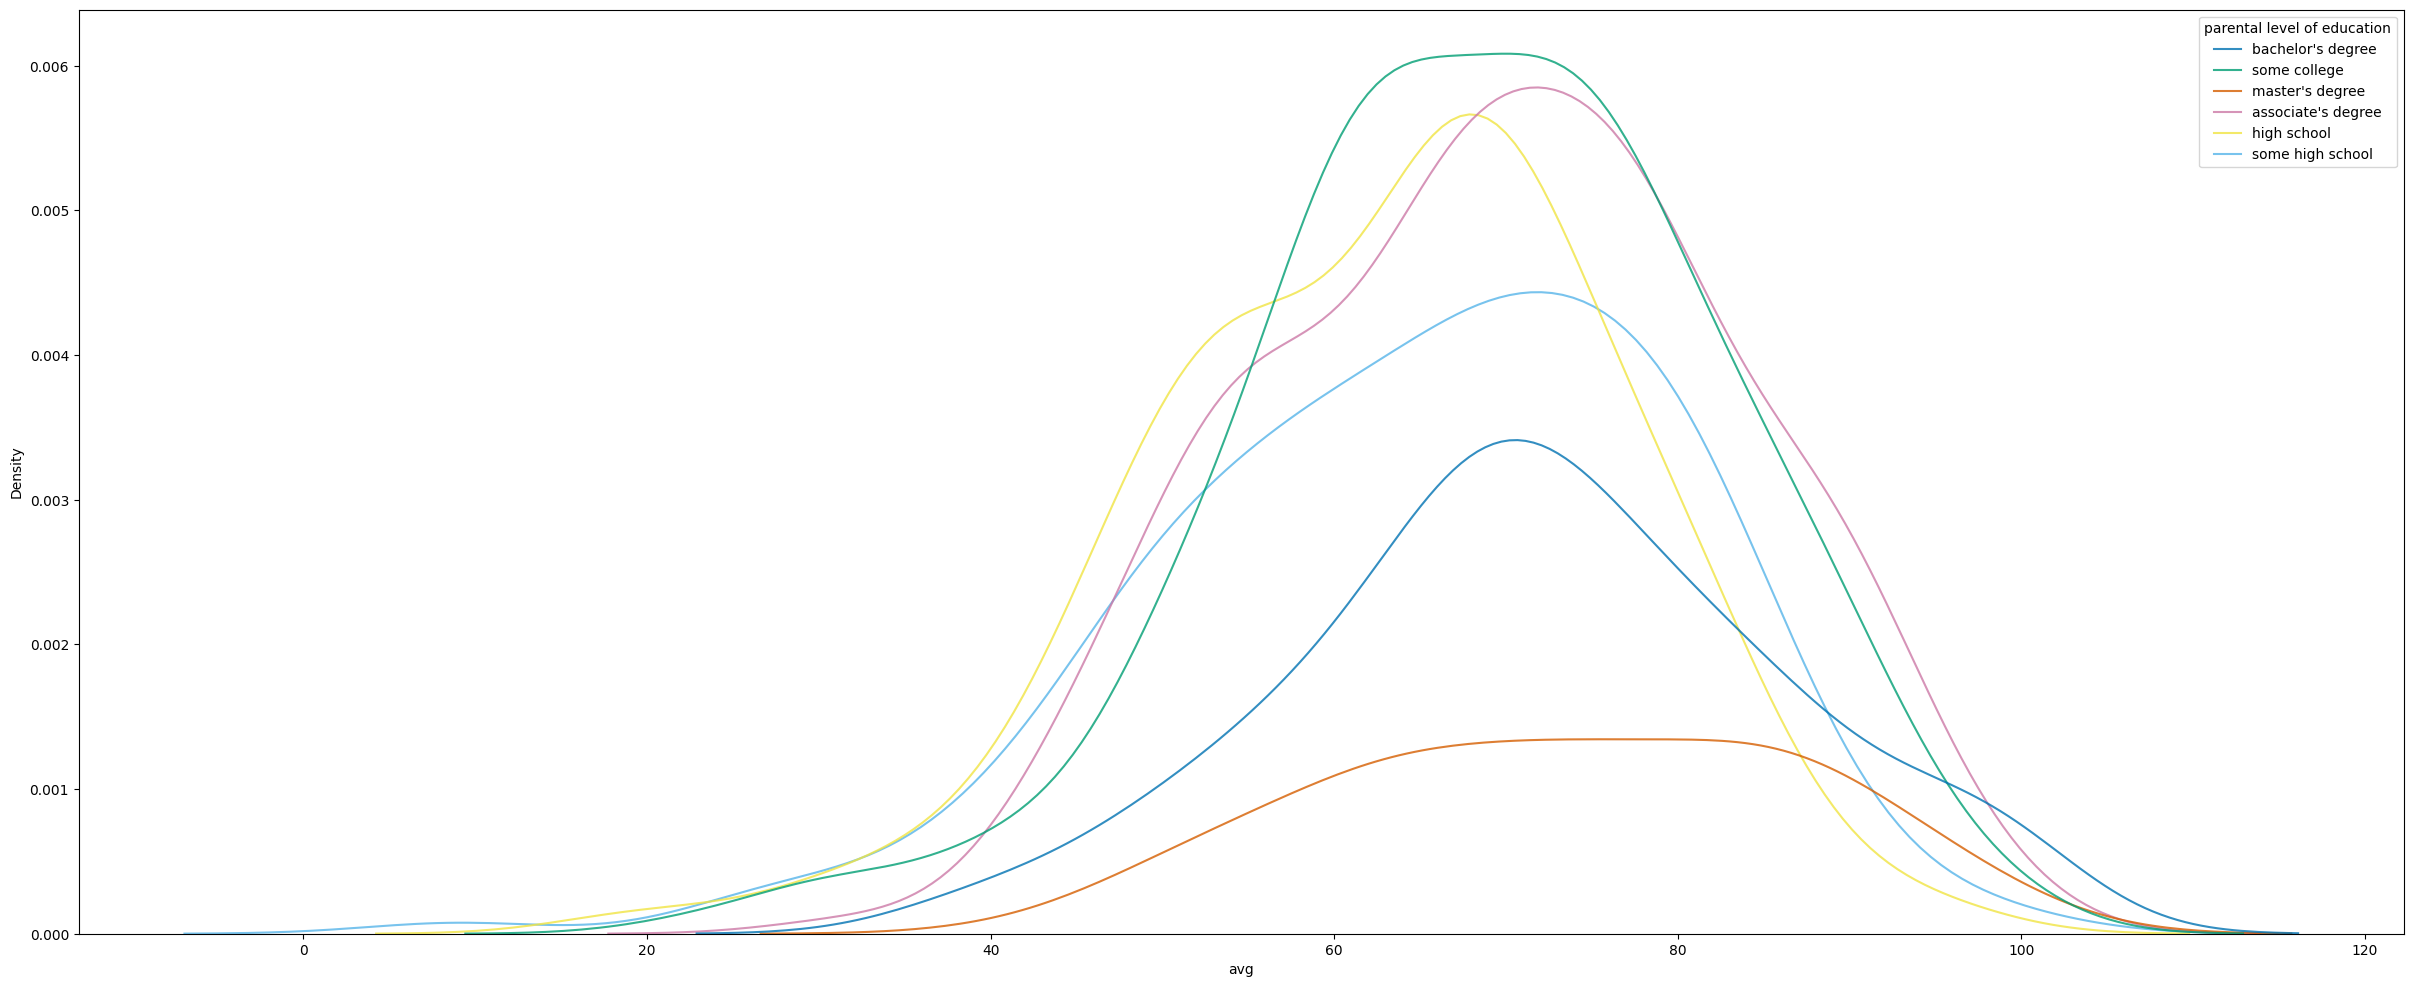

In [460]:
# nivel de estudios de los padres
sns.kdeplot(data=df, x='avg', hue='parental level of education', alpha=0.8)

In [446]:
avg_by_parent_edu=df.groupby('parental level of education')['avg'].mean().sort_values(ascending=False)
pd.DataFrame(avg_by_parent_edu)

,avg
parental level of education,
master's degree,73.598870
bachelor's degree,71.923729
associate's degree,69.569069
some college,68.476401
some high school,65.108007
high school,63.096939


* En general, a mayor nivel educativo tengan los padres, mayor es el rendimiento escolar de los estudiantes.


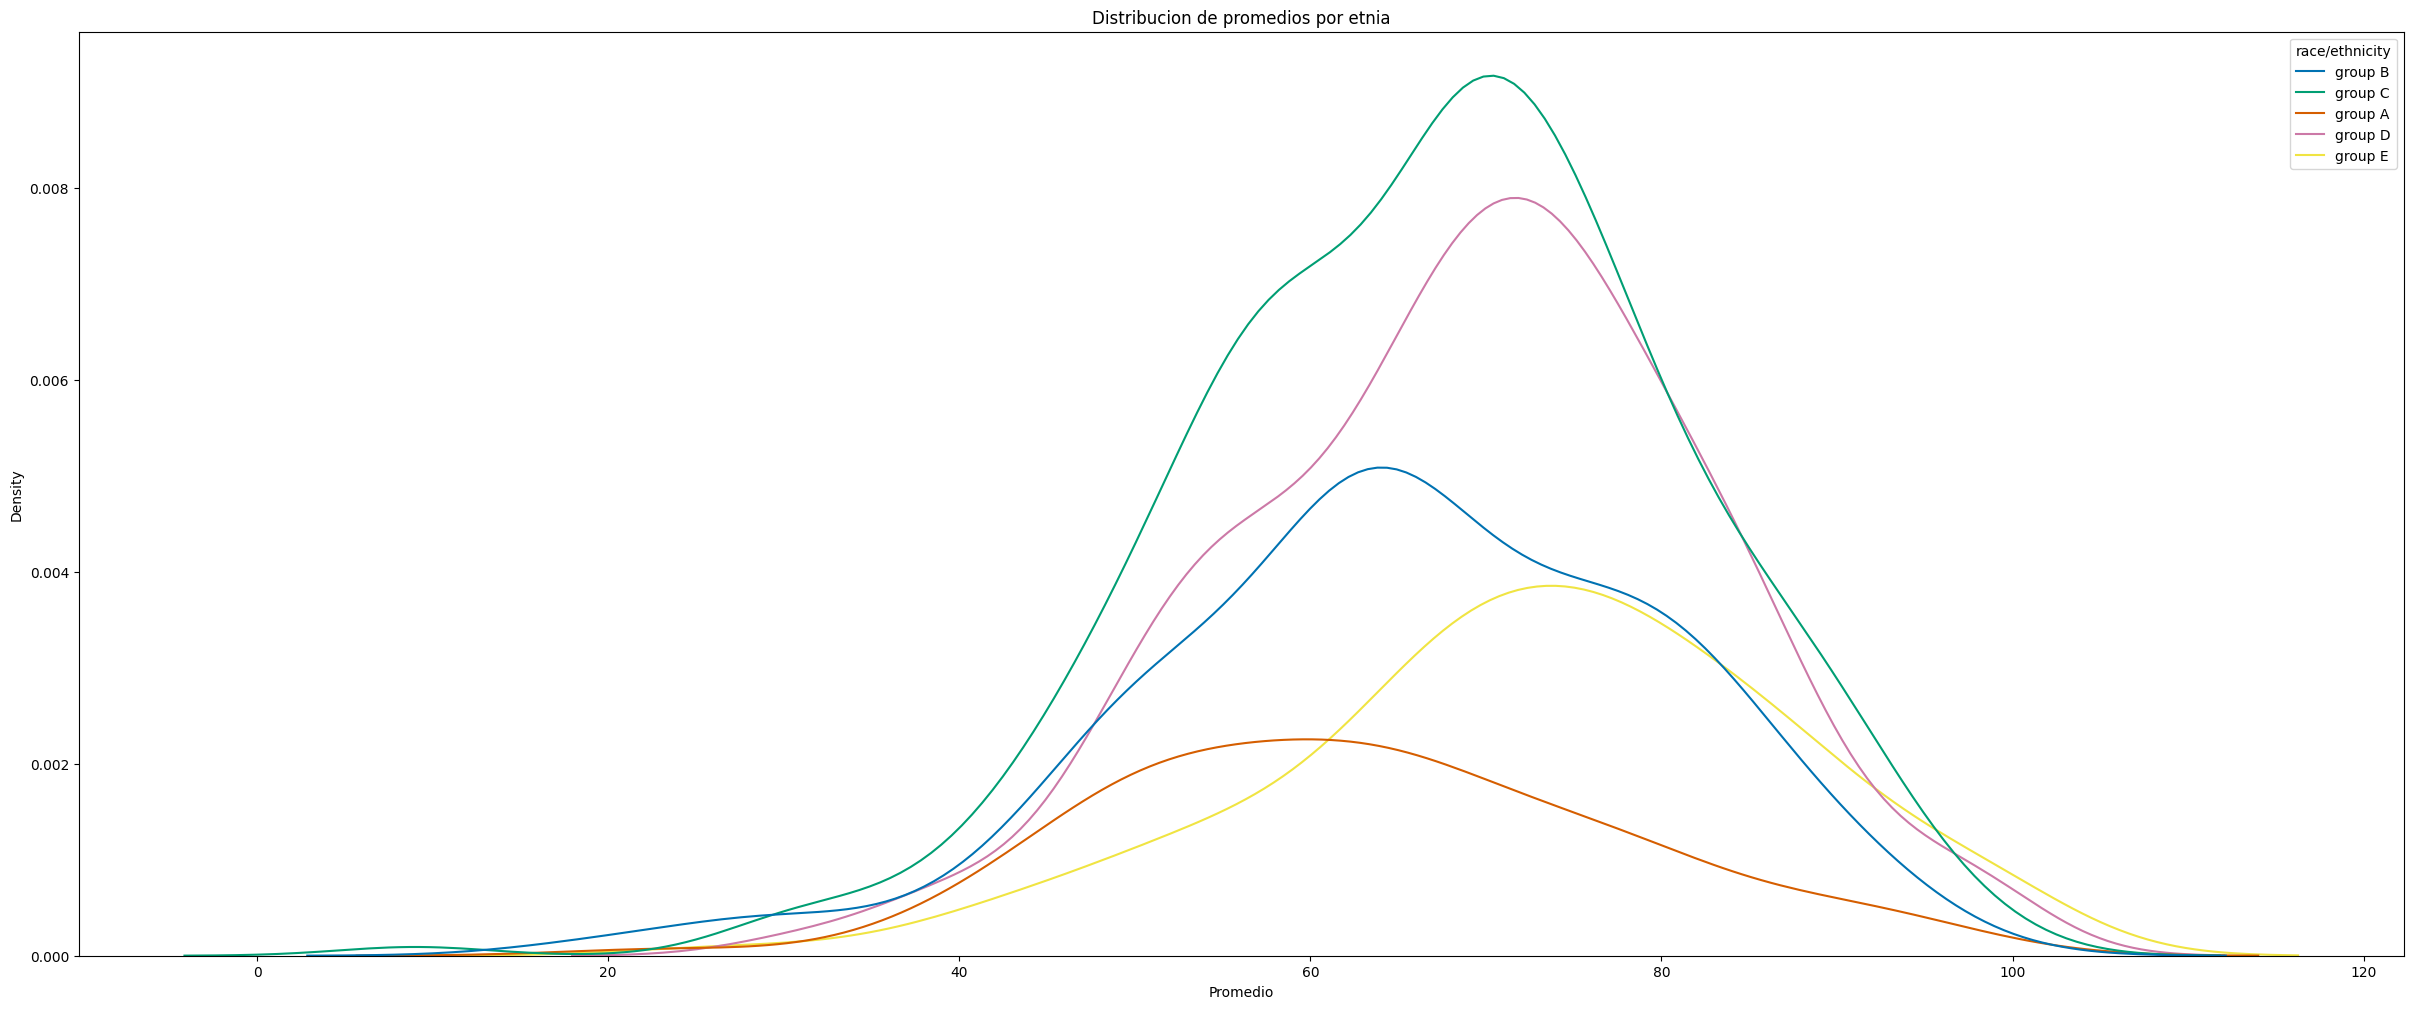

In [447]:
# etnia

sns.kdeplot(data=df, x='avg', hue='race/ethnicity')
plt.title('Distribucion de promedios por etnia')
plt.xlabel('Promedio')
plt.ylabel('Density')
plt.show()

Los estudiantes del grupo A y B tienden a rendir poco en los examenes.


### Distribucion de variables categoricas-Conteo/Proporcion

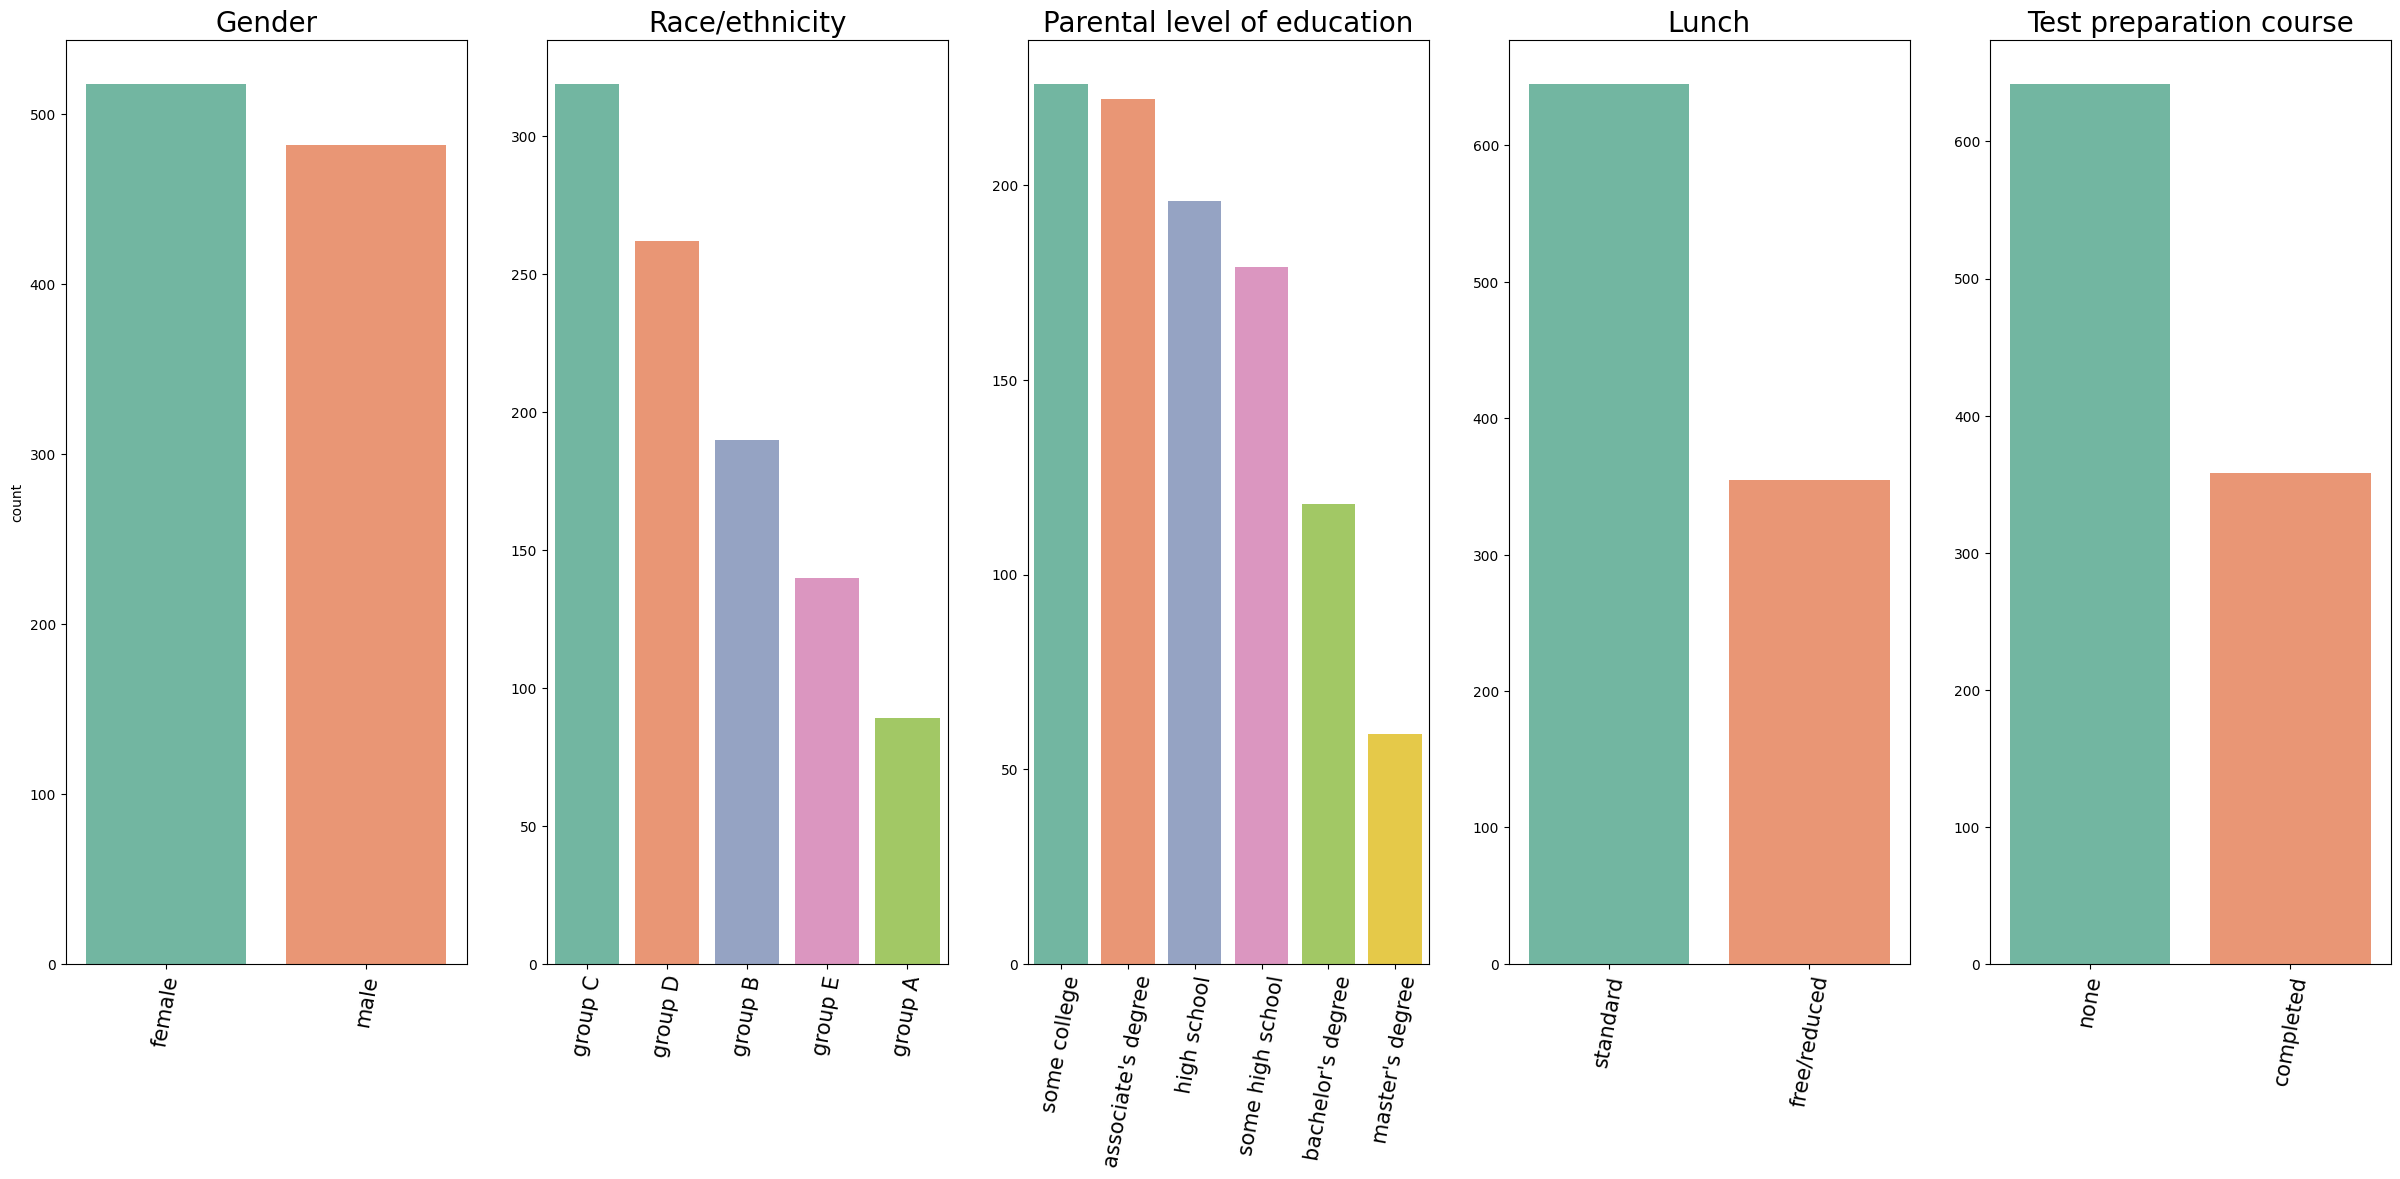

In [448]:


def plot_subplot(col:str, plot_idx:int, n_row:int =1, n_col:int=5):
    plt.subplot(n_row, n_col, plot_idx)
    size = df[col].value_counts()

    sns.barplot(size, palette='Set2')
    plt.title(col.capitalize(), fontsize = 20)
    plt.xlabel('')
    plt.xticks(rotation=80, fontsize=15)

    if idx>0:
        plt.ylabel("")



plt.rcParams['figure.figsize'] = (30, 12)
for idx, col in enumerate(variables_categ):
    plot_subplot(col, idx+1)

plt.show()


* La variable sexo es la mas balanceada con un ~51% para mujeres y 49% para hombres.
* El grupo C es el mas grande entre los grupos etnicos de los estudiantes, por el contrario el grupo A es el menos representado.
* Los estudiantes con padres con estudios superiores (licenciatura o maestria) son minoria.
* El grupo de personas que no almuerzan es aproximadamente el 35%
* El numero de estudiantes que no tomaron ningun curso de preparacion es el doble de los que si lo hicieron.


### Impacto del genero en el rendimiento escolar

In [449]:
gender_group=df.groupby('gender')[variables_numericas+['avg']].mean()
gender_group

,math score,reading score,writing score,avg
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [450]:
sobresalientes=df[df['avg']>=90].groupby('gender')['avg'].count()
sobresalientes=pd.DataFrame(sobresalientes)
sobresalientes.columns=['Numero']
sobresalientes

,Numero
gender,
female,38
male,14


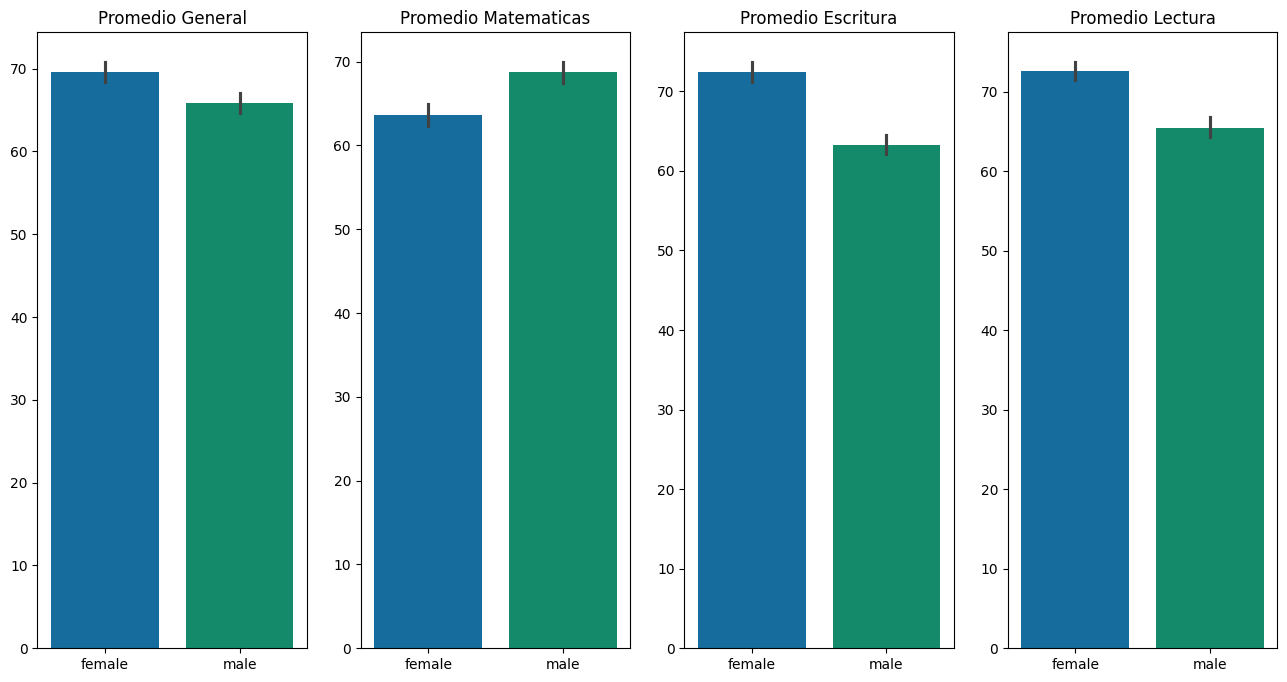

In [451]:
fig, axs=plt.subplots(1,4, figsize=(16,8))

sns.barplot(data=df, x='gender', y='avg', hue='gender', ax=axs[0])
axs[0].set_title('Promedio General')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.barplot(data=df, x='gender', y='math score', hue='gender', ax=axs[1])
axs[1].set_title('Promedio Matematicas')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

sns.barplot(data=df, x='gender', y='writing score', hue='gender', ax=axs[2])
axs[2].set_title('Promedio Escritura')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

sns.barplot(data=df, x='gender', y='reading score', hue='gender', ax=axs[3])
axs[3].set_title('Promedio Lectura')
axs[3].set_xlabel('')
axs[3].set_ylabel('')

plt.show()

* El promedio general de las mujeres es mayor que el de los hombres.
* En lectura y escritura las mujeres tienen mayor promedio que los hombres.
* En matematicas, los hombres tienen mayor promedio que las mujeres
* Entre los alumnos sobresalientes (promedio > 90) hay mas del doble de alumnas sobresalientes que hombres.

### Impacto del frupo etnico en el rendimiento escolar

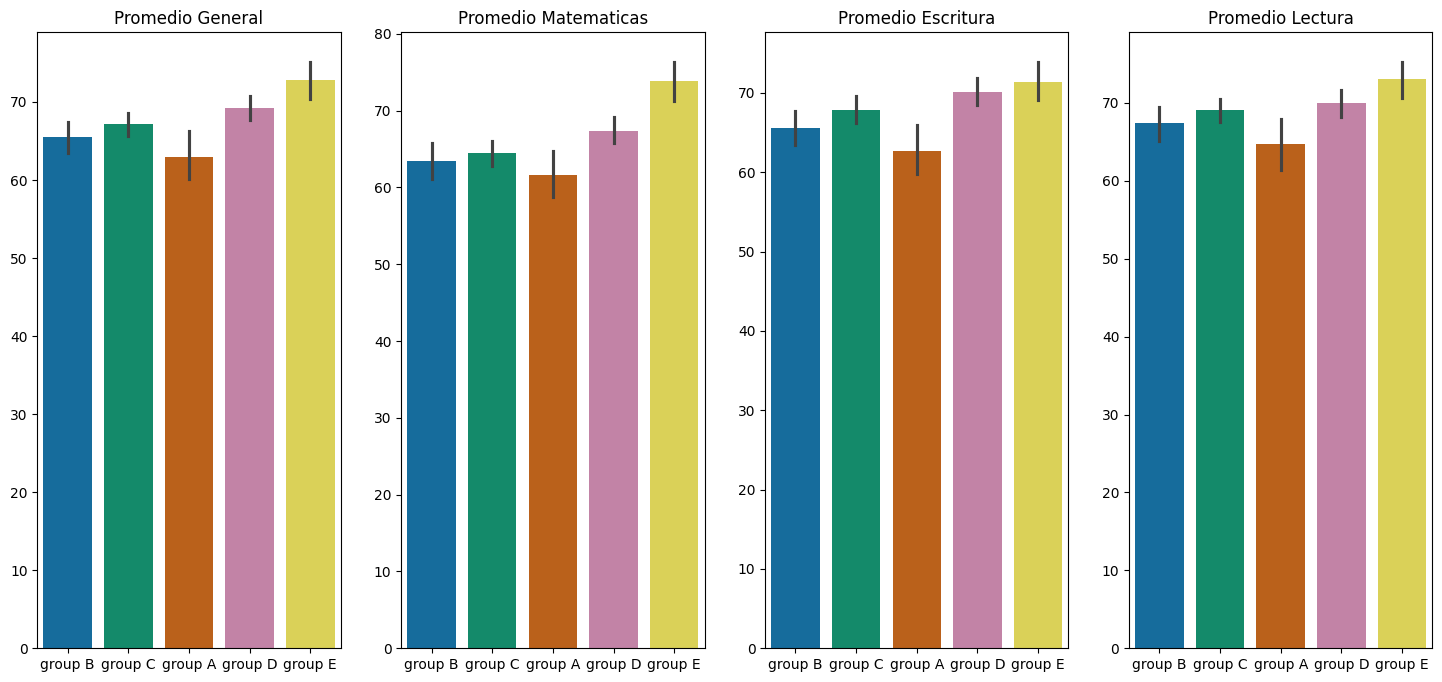

In [452]:
fig, axs=plt.subplots(1,4, figsize=(18,8))

sns.barplot(data=df, x='race/ethnicity', y='avg', hue='race/ethnicity', ax=axs[0])
axs[0].set_title('Promedio General')
axs[0].set_xlabel('')
axs[0].set_ylabel('')


sns.barplot(data=df, x='race/ethnicity', y='math score', hue='race/ethnicity', ax=axs[1])
axs[1].set_title('Promedio Matematicas')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

sns.barplot(data=df, x='race/ethnicity', y='writing score', hue='race/ethnicity', ax=axs[2])
axs[2].set_title('Promedio Escritura')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

sns.barplot(data=df, x='race/ethnicity', y='reading score', hue='race/ethnicity', ax=axs[3])
axs[3].set_title('Promedio Lectura')
axs[3].set_xlabel('')
axs[3].set_ylabel('')

plt.show()

* Independientemente de la materia, los estudiantes del grupo etnico E tienden a rendir mejor en los examenes.
* Los alumnos del grupo A tienden a rendir peor en todas las materias.

### Impacto del nivel educativo de los padres


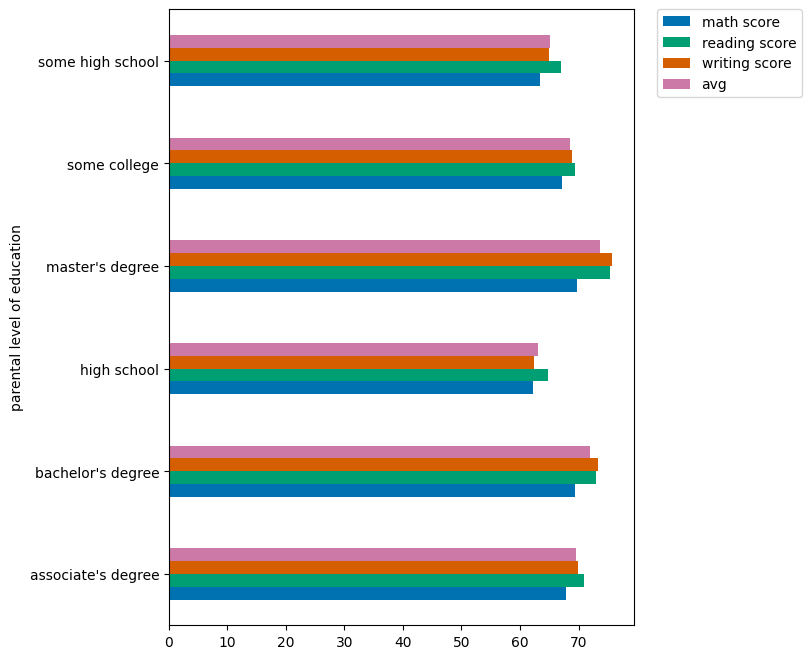

In [453]:
df.groupby('parental level of education')[variables_numericas + ['avg']].agg('mean').plot(kind='barh',figsize=(6,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Los alumnos con padres con nivel academico de licenciatura o maestria tienden a tener mejor rendimiento en los examenes.

### Impacto del almuerzo

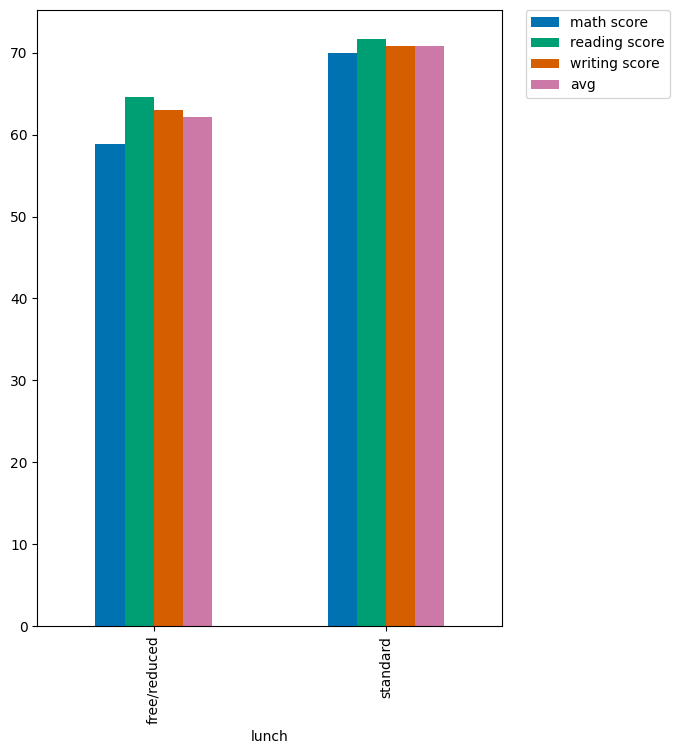

In [454]:
df.groupby('lunch')[variables_numericas + ['avg']].agg('mean').plot(kind='bar',figsize=(6,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* Los alumnos que tienen un almuerzo completo tienden a tener un mejor rendimiento los examenes que aquellos que no.
* La falta total o parcial del almuerzo tienen una correlacion mayor con un rendimiento menor en la materia de matematicas

### Impacto del curso de preparacion para el examen

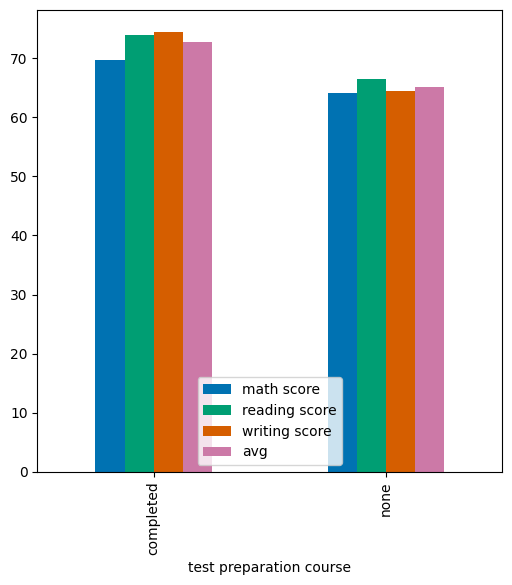

In [455]:
df.groupby('test preparation course')[variables_numericas + ['avg']].agg('mean').plot(kind='bar',figsize=(6,6))
plt.show()

In [456]:
df.groupby('test preparation course')[variables_numericas+['avg']].mean()

,math score,reading score,writing score,avg
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


* En promedio, el examen de preparacion ayuda a mejorar la calificacion de los examenes por aproximadamente 7 puntos.

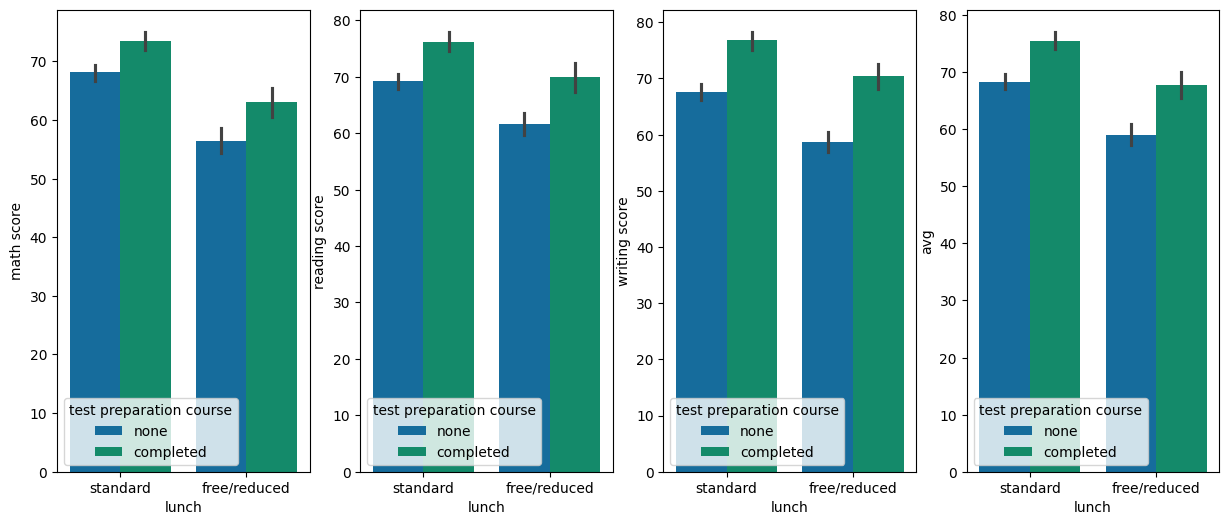

In [457]:
# almuerzo y preparacion para los examenes 
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,4,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,4,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.subplot(1,4,4)
sns.barplot (x=df['lunch'], y=df['avg'], hue=df['test preparation course']);

Los estudiantes que completaron el curso de preparacion tienen mejores calificaciones en las tres materias que aquellos que no lo tomaron.

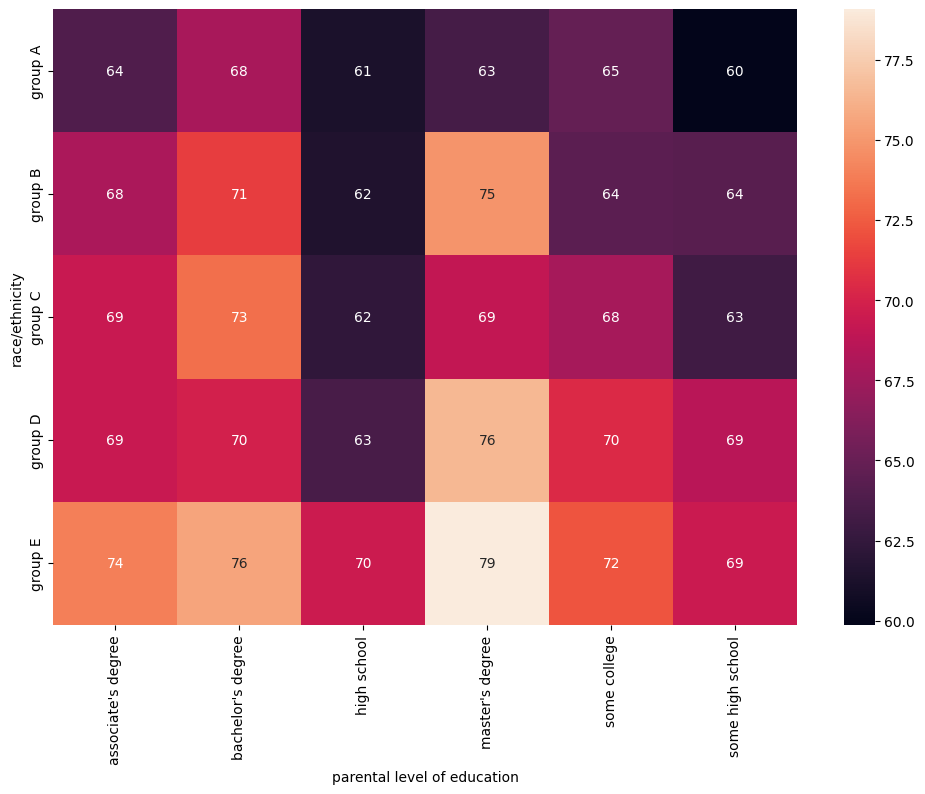

In [458]:
# Variables sociales
plt.figure(figsize=(12,8))
social_v=pd.pivot_table(data=df, values='avg',index='race/ethnicity', columns='parental level of education')
sns.heatmap(social_v, annot=True)
plt.show()

Considerando unicamente las variables nivel educativo de los padres y el grupo etnico de los estudaintes
* El grupo de estudiantes hijos de padres con maestria y que pertenecen al grupo E tienen el mayor promedio.
* Los hijos preparatoria no acabada y del grupo A tienen el peor rendimiento en promedio.

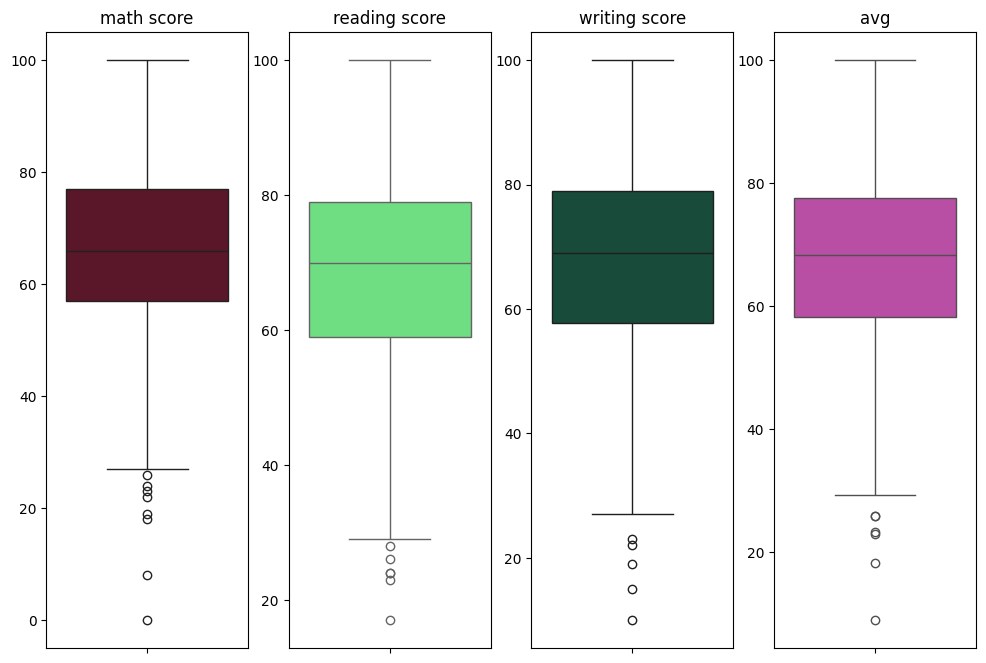

In [459]:
### Valores extremos
fig, axes=plt.subplots(1,4,figsize=(12,8))

for idx, col in enumerate(variables_numericas+['avg']):  
    sns.boxplot(data=df, y=col, ax=axes[idx], color=np.random.rand(3))
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

* La materia de matematicas es la que tiene mas valores extremos, con incluso un estudiante con 0 de calificacion.

## Conclusiones
* Las mujeres tienen mejores calificaciones generales. Entre los alumnos sobresalientes las mujeres doblan en numero a los hombres.
* Las variables de etnia, nivel educativo de los padres, y almuerzo son importantes para el rendimiento en examenes.
* La materia mas dificil entre los estudiantes es matematicas.

